In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!pip3 install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 14.5 MB 174 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import fiona
import geopandas as gpd

shapefile = "../raw_data/WorldMap/ne_110m_admin_0_countries.shp"
geo_df = gpd.read_file(shapefile)

## Get Data

In [2]:
country_names = ['France','Germany','Italy','Spain','UK']
data = {}
sd = {}
for country in country_names:
    df_before = pd.read_csv('mcmc_data/'+country+"/fLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/fLock_after.csv")
    data[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    sd[country] = [df_before.loc[4][2], df_after.loc[4][2]]

## Bar Plot

### First Lockdown

In [3]:
def barplotReproduction(df, df_sd):
    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, yerr=df_sd, error_kw=dict( capsize=3, color='black', alpha=0.5, marker='x'))
    #ax = df.plot(kind='bar') # "same" as above
    ax.set_xlabel('Country')
    ax.legend(["Before LockDown", "After LockDown", "Standard Deviation"], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Reproduction rate (R0)')
    ax.set_title('Reproduction Rate before and after Lockdown')

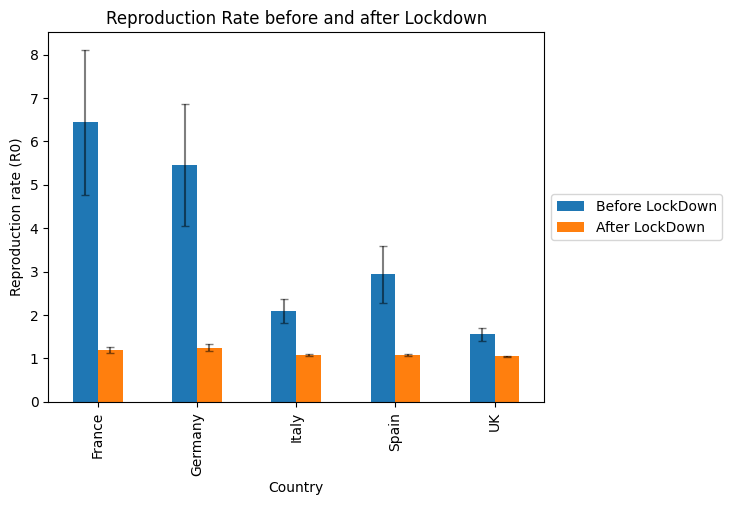

In [4]:
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd)

## Test

In [62]:
df = pd.DataFrame(data).T
df.columns = ['before_R0','after_R0']
df['SOVEREIGNT'] = ['France','Germany','Italy','Spain','United Kingdom']
df

,before_R0,after_R0,SOVEREIGNT
France,6.43699,1.19093,France
Germany,5.45193,1.24860,Germany
Italy,2.09654,1.08539,Italy
Spain,2.93502,1.07429,Spain
UK,1.55198,1.04825,United Kingdom


In [65]:
# General Information
country_list = ['France','Germany','Italy','Spain','United Kingdom']
col = "Example"
map_df = geo_df[geo_df['NAME'].isin(country_list)]
map_df = map_df.merge(df, on=['SOVEREIGNT'])
map_df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,before_R0,after_R0
0,Admin-0 country,1,2,France,FR1,1,2,Country,1,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",6.43699,1.19093
1,Admin-0 country,1,2,Germany,DEU,0,2,Sovereign country,1,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",5.45193,1.24860
2,Admin-0 country,1,2,Spain,ESP,0,2,Sovereign country,1,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",2.93502,1.07429
3,Admin-0 country,1,2,Italy,ITA,0,2,Sovereign country,1,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",2.09654,1.08539
4,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,1,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",1.55198,1.04825


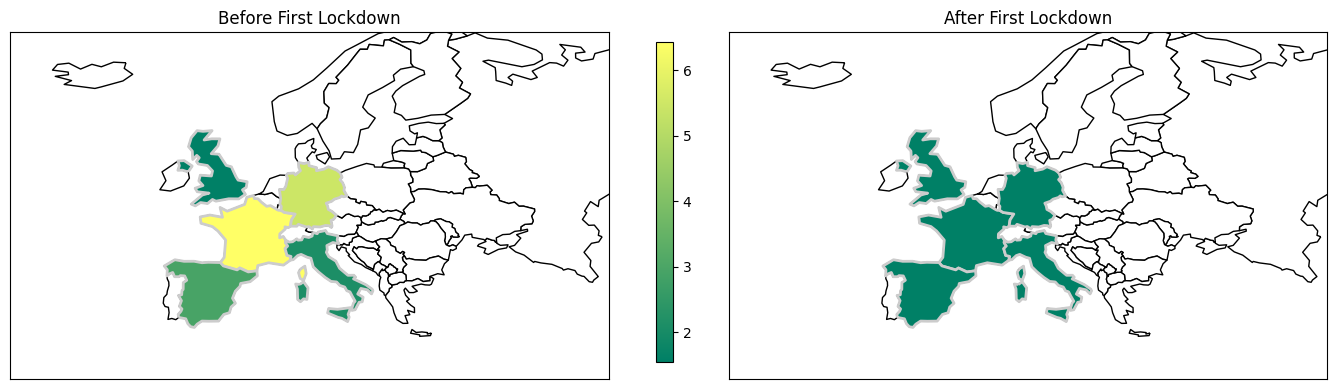

In [116]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(17,8))    

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

col = 'before_R0'
vmin = df[col].min()
vmax = df[col].max()

# Adding Cmap to 
cmap = 'summer'

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=2, cmap=cmap)
cbaxes = fig.add_axes([0.505, 0.30, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)
ax.set_title('Before First Lockdown')

col = 'after_R0'
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax2, color='white', edgecolor='black')
# Adding Cmap to 
map_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=2, cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Setting Axis limits
ax2.set_xlim(-30, 50)
ax2.set_ylim(30, 70)
ax2.set_xticks=[]
ax2.set_title('After First Lockdown')
ax2.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
ax.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)